# Example 4: Plot IR spectrum of H2O molecule

Documentation is [here](https://qclovers.github.io/PyTDSCF/pytdscf.html#module-pytdscf.spectra)

The IR absorption spectrum is obtained by the Fourier transformation procedure

$$
\begin{align}
  I_r(\omega)
    &\simeq\frac{\pi\omega}{3c\epsilon_0\hbar^2} 
\frac{Re}{\pi}\int_0^T e^{i(\hbar\omega+E_0)t} g(t)a_r(t) dt
\end{align}
$$

where $a_r(t)=\langle\Psi_\mu(0)|\Psi_\mu(t)\rangle$ is an autocorrelation function, $E_0$ can be regarded as the vibrational ground state energy
and $g(t)$ is the window function, 
defaults to $g(t)=\cos^2\left(\frac{\pi t}{2T}\right)$ 


## 1. Check autocorrelation file

In [1]:
!ls h2o_polynomial_prop/autocorr*

h2o_polynomial_prop/autocorr.dat


## 2. Fourier transform and plot
By the so-called t/2-trick, the correlation time is twice the propagation time.

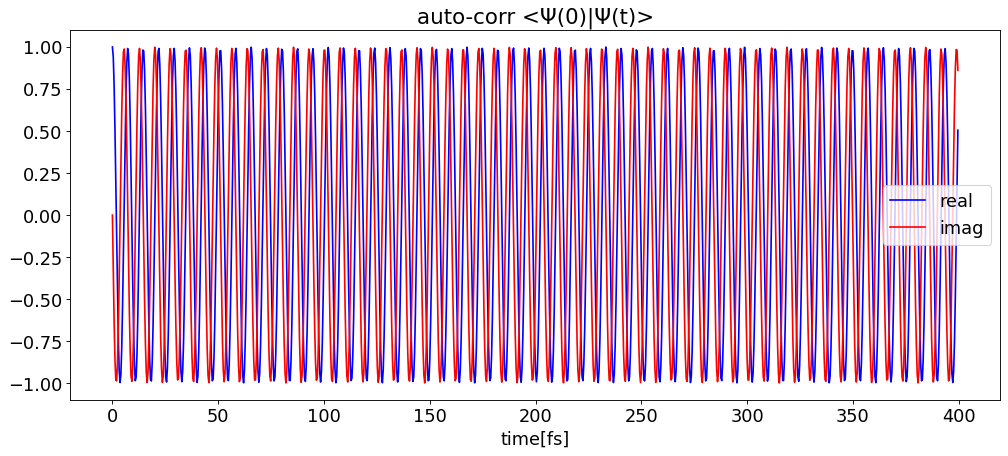

delta_t:  0.200[fs], max_freq: 166782.0[cm-1]


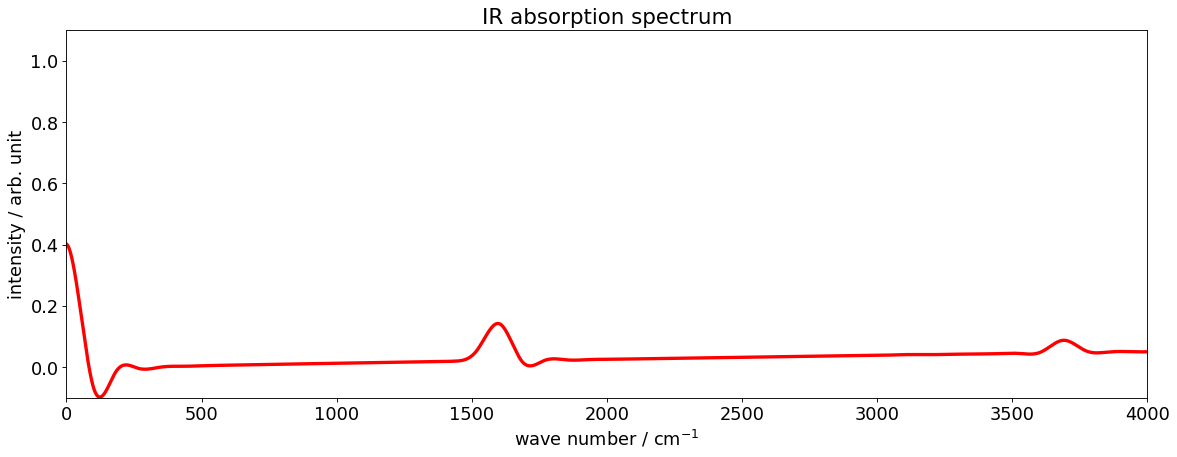

In [2]:
import pytdscf

E_0 = 0.5675130  # estimated zero point energy in example 1
time, autocorr = pytdscf.spectra.load_autocorr(
    "h2o_polynomial_prop/autocorr.dat"
)
pytdscf.spectra.plot_autocorr(time, autocorr, gui=False)
freq, intensity = pytdscf.spectra.ifft_autocorr(time, autocorr, E_shift=E_0)
pytdscf.spectra.plot_spectrum(
    freq,
    intensity,
    lower_bound=0,
    upper_bound=4000,
    show_in_eV=False,
    gui=False,
)